# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World


## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [ ]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [ ]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`. 

In [ ]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0
    
    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action) 
        
        if (action == "suck"): 
            num_cleaned = num_cleaned + 1
        
    return num_cleaned
        


Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [ ]:
simple_environment(simple_randomized_agent, max_steps = 20)

env=np.random.choice(3, size=(n, n), p=[0.7, 0.3, 0])# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environmnt for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [1]:
def simple_environment(agent,robot_position, max_steps, n, bumpers = {"north" : False, "east" : False, "south" : False, "west" : False, "suck" : False }, verbose = False):  
    # creates environment and adds dirty cells randomly
    env=np.random.choice(3, size=(n, n), p=[0.8, 0.2, 0]) # adds dirt as '1', and empty cells as '0'
    env[0] = [2 for i in range(n)] # adds walls as '2'
    env[n-1] = [2 for i in range(n)]
    env[:,0] = [2 for i in range(n)]
    env[:,n-1]=[2 for i in range(n)]
    if verbose == True: print(env)
    # randomly put robot inside the environment
    if verbose == True: 
        print('Starting cleaning process:') 
        print('Current position:', robot_position) 

    reward_space = np.zeros(shape = (n,n))
    for i in range(max_steps): 
    # for each step, environment feeds sensors. Turning them on and off.
        # Bumper Sensors (also works for obstacles):
        if env[robot_position[0]-1][robot_position[1]]==2: bumpers["north"]=True
        if env[robot_position[0]][robot_position[1]+1]==2: bumpers["east"]=True
        if env[robot_position[0]+1][robot_position[1]]==2: bumpers["south"]=True
        if env[robot_position[0]][robot_position[1]-1]==2: bumpers["west"]=True
        if env[robot_position[0]-1][robot_position[1]]==0: bumpers["north"]=False
        if env[robot_position[0]][robot_position[1]+1]==0: bumpers["east"]=False
        if env[robot_position[0]+1][robot_position[1]]==0: bumpers["south"]=False
        if env[robot_position[0]][robot_position[1]-1]==0: bumpers["west"]=False
        # Dirt Sensors:
        if env[robot_position[0]][robot_position[1]]==1: bumpers["suck"]=True
        if env[robot_position[0]][robot_position[1]]==0: bumpers["suck"]=False
        # Couldn't directly put this into agent function for model based agent. Therefore, it ended up in Environment function. 
        # Simple Reflex agent doesn't use this. 
        reward_space[robot_position[0]][robot_position[1]]=reward_space[robot_position[0]][robot_position[1]]+1
        ## Agent chooses action based on what type of agent it is. 
        chosen_Act = agent(bumpers,robot_position,reward_space,verbose)
        # relocate robot:
        if chosen_Act == 'east':
            delta = [0,1]
        if chosen_Act == 'west':
            delta = [0,-1]
        if chosen_Act == 'south':
            delta = [1,0]  
        if chosen_Act == 'suck':
            delta = [0,0]
        if chosen_Act == 'north':
            delta = [-1,0]
        if chosen_Act=='suck':
            env[robot_position[0]][robot_position[1]]=0
        else:
            env=env

        robot_position = robot_position + delta
        
        # once the environment is completely clean. break out of for loop, prints out the
        # now clean environment. 
        if 1 not in env:
            if verbose == True: 
                print('cleaned environment:')  
                print(env)           
            break
        
    return i+1, robot_position

## Task 2:  Implement a simple reflex agent [10 Points] 

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

In [2]:
import numpy as np 

def simple_agent(bumpers,robot_position, reward_space, verbose):
    # all possible actions beside sucking. 
    actions = ["north", "east", "west", "south"]
    # it will choose movement action randomly however, it won't bump into the wall/obstacle. Because, it has
    # sensor information based on its current location. 
    if bumpers["suck"] == True: 
        chosen_Act = 'suck'
    else:
        if bumpers["north"] == True: actions.remove('north')
        if bumpers["south"] == True: actions.remove('south')
        if bumpers["east"] == True: actions.remove('east')
        if bumpers["west"] == True: actions.remove('west')
        chosen_Act = np.random.choice(actions)
    return chosen_Act

bumpers = {"north" : False, "east" : False, "south" : False, "west" : False, "suck" : False }
n = 10 # size of the room
robot_position = np.random.choice([i for i in range(1,n-1)], size=(1, 2))[0]
print('starting cleaning the room: Simple Reflex Agent')
stepsize = simple_environment(simple_agent, robot_position, max_steps = 5000, n = n + 2, verbose = False)
stepsize

starting cleaning the room: Simple Reflex Agent


(662, array([6, 3]))

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/store_agent_state_information.ipynb))

In [3]:
# Your short description of the state and your implementation goes here

In [4]:
import numpy as np 

# This function wasn't integrated properly with the environment properly. What this does is to navigate 
# agent to Northwestern corner (1,1) of the room. So that robot knows where it is. 
def find_station(n,robot_position,max_steps, verbose = False):
    chosen_Act = 'north'
    for i in range(max_steps):
        # sensors sensing
        if robot_position[0] == n-2: bumpers["south"] = True
        if robot_position[0] != n-2: bumpers["south"] = False 
        if robot_position[1] == n-2: bumpers["east"] = True
        if robot_position[1] != n-2: bumpers["east"] = False
        if robot_position[1] == 1: bumpers["west"] = True
        if robot_position[1] != 1: bumpers["west"] = False
        if robot_position[0] == 1: bumpers["north"] = True
        if robot_position[0] != 1: bumpers["north"] = False
        # rationalizing action
        if bumpers[chosen_Act] == True: 
            chosen_Act = 'west' 
        else: 
            chosen_Act = chosen_Act
        if bumpers[chosen_Act] == True:
            memory_position = robot_position
            break
        # relocate the agent
        if chosen_Act == 'east':
            delta = [0,1]
        if chosen_Act == 'west':
            delta = [0,-1]
        if chosen_Act == 'south':
            delta = [1,0]  
        if chosen_Act == 'suck':
            delta = [0,0]
        if chosen_Act == 'north':
            delta = [-1,0]         
        # changed position
        robot_position = robot_position + delta
    if verbose == True:print('arrived at', robot_position, '--> Northwest corner')
    return robot_position # returns the end position which is the corner.

def reward_based_movement(robot_position, reward_space, actions):
    # put this after possible actions are reduced by bumpers!
    # robot_position = [0, 0]
    # actions = {"east" : [0,1], "south" : [1,0]}
    p_pos, p_reward = list(), list()
    p_delta = [j for i,j in actions.items()]
    for i in range(len(p_delta)):
        p_pos.append(np.array(robot_position) + p_delta[i])
        #print(reward_space)
        p_reward.append(reward_space[p_pos[-1][0]][p_pos[-1][1]])
    idx = p_reward.index(min(p_reward)) # find index of the low reward direction
    act = list(actions.keys())[idx]
    #print(chosen_Act) 
    #print(reward_space)
    return act

def model_based_agent(bumpers,robot_position,reward_space, verbose):
    # all possible actions beside sucking. 
    actions = {"north" : [-1,0] , "east": [0,1], "west" : [0,-1], "south" : [1, 0]}
    # it will choose movement action randomly however, it won't bump into the wall/obstacle. Because, it has
    # sensor information based on its current location. 
    if bumpers["suck"] == True: 
        chosen_Act = 'suck'
    else:
        if bumpers["north"] == True: 
            del actions['north']
        if bumpers["south"] == True: 
            del actions['south'] 
        if bumpers["east"] == True: 
            del actions['east'] 
        if bumpers["west"] == True: 
            del actions['west'] 
        #This shows how reward_space changes as agent moves.
        if verbose == True: print(reward_space) 
        chosen_Act = reward_based_movement(robot_position,reward_space,actions)

    return chosen_Act        

In [5]:
bumpers = {"north" : False, "east" : False, "south" : False, "west" : False, "suck" : False }
n = 10 # size of the room 
robot_position = np.random.choice([i for i in range(1,n-1)], size=(1, 2))[0]
print('moving to corner : northwest')
robot_position = find_station(n,robot_position,max_steps = 1000)
print('starting cleaning the room: Model Based Agent')
stepsize = simple_environment(model_based_agent, robot_position, 5000, n = n + 2, verbose = False)
stepsize[0]

moving to corner : northwest
starting cleaning the room: Model Based Agent


114

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents. 
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/charts_and_tables.ipynb))

In [6]:
import numpy as np 

def random_agent(bumpers,robot_position, reward_space, verbose):
    # all possible actions including sucking. 
    actions = ["north", "east", "west", "south", "suck"]
    # Random agent determines its action completely random. 
    # It doesn't suck the dirt as it senses
    if bumpers["north"] == True: actions.remove('north')
    if bumpers["south"] == True: actions.remove('south')
    if bumpers["east"] == True: actions.remove('east')
    if bumpers["west"] == True: actions.remove('west')
    chosen_Act = np.random.choice(actions)
    return chosen_Act
bumpers = {"north" : False, "east" : False, "south" : False, "west" : False, "suck" : False }
n = 10 # size of the room 
robot_position = np.random.choice([i for i in range(1,n-1)], size=(1, 2))[0]
print('starting cleaning the room: Randomized Agent')
stepsize = simple_environment(random_agent, robot_position, 1000000, n = n + 2, verbose = False)
stepsize[0]

starting cleaning the room: Randomized Agent


1900

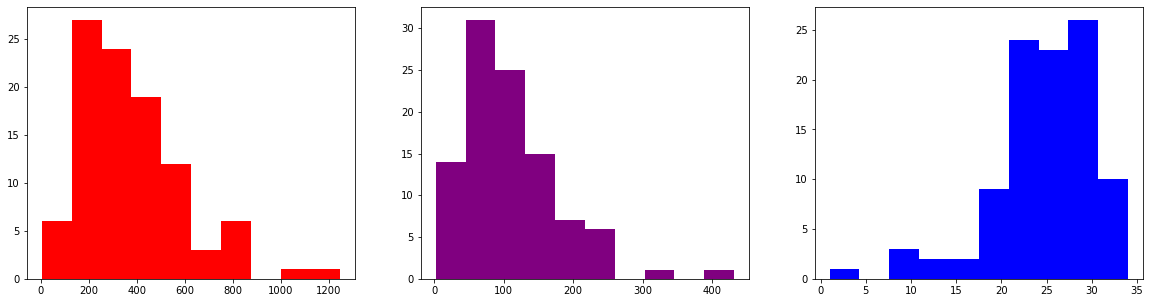

In [10]:
import matplotlib.pyplot as plt
n = 5
fig = plt.figure(figsize=(20,5))

simple_agentf = list()
plt.subplot(1,3,2)
for i in range(100):
    robot_position = np.random.choice([i for i in range(1,n-1)], size=(1, 2))[0]
    robot_position = find_station(n,robot_position,max_steps = 1000)
    stepsize = simple_environment(simple_agent, robot_position, 100000, n = n + 2, verbose = False)[0]
    simple_agentf.append(stepsize)
    simple_agentf = [i for i in simple_agentf if i < 100000]
plt.hist(simple_agentf, bins=10, color = 'purple') # simple reflex agent 

plt.subplot(1,3,3)
model_based_agentf = list()
for i in range(100):
    robot_position = np.random.choice([i for i in range(1,n-1)], size=(1, 2))[0]
    robot_position = find_station(n,robot_position,max_steps = 1000)
    stepsize = simple_environment(model_based_agent, robot_position, 100000, n = n + 2, verbose = False)[0]
    model_based_agentf.append(stepsize)
    model_based_agentf = [i for i in model_based_agentf if i < 100000]
plt.hist(model_based_agentf, bins=10, color = 'blue') # model-based reflex agent

plt.subplot(1,3,1)
random_agentf = list()
for i in range(100):
    robot_position = np.random.choice([i for i in range(1,n-1)], size=(1, 2))[0]
    robot_position = find_station(n,robot_position,max_steps = 1000)
    stepsize = simple_environment(random_agent, robot_position, 100000, n = n + 2, verbose = False)[0]
    random_agentf.append(stepsize)
    random_agentf = [i for i in random_agentf if i < 100000]
plt.hist(random_agentf, bins=10, color = 'red') # model-based reflex agent

plt.show()


In [15]:
# mean values for 5 x 5 room
np.mean(random_agentf), np.mean(simple_agentf), np.mean(model_based_agentf)

(2910.29, 876.16, 114.67)

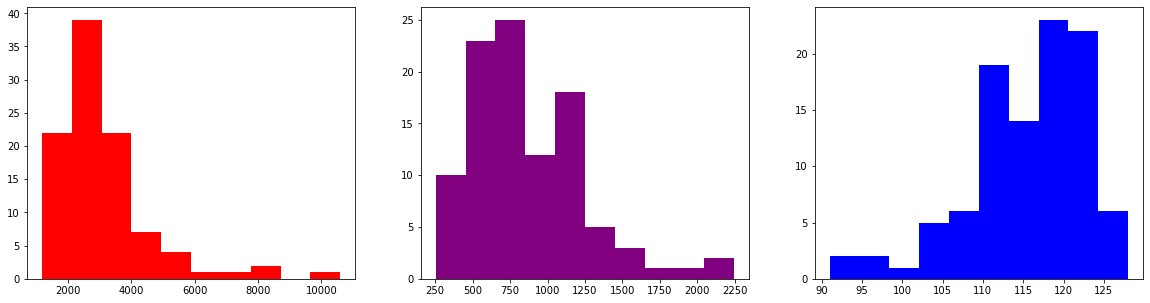

In [12]:
import matplotlib.pyplot as plt
n = 10
fig = plt.figure(figsize=(20,5))

simple_agentf = list()
plt.subplot(1,3,2)
for i in range(100):
    robot_position = np.random.choice([i for i in range(1,n-1)], size=(1, 2))[0]
    robot_position = find_station(n,robot_position,max_steps = 1000)
    stepsize = simple_environment(simple_agent, robot_position, 100000, n = n + 2, verbose = False)[0]
    simple_agentf.append(stepsize)
    simple_agentf = [i for i in simple_agentf if i < 100000]
plt.hist(simple_agentf, bins=10, color = 'purple') # simple reflex agent 

plt.subplot(1,3,3)
model_based_agentf = list()
for i in range(100):
    robot_position = np.random.choice([i for i in range(1,n-1)], size=(1, 2))[0]
    robot_position = find_station(n,robot_position,max_steps = 1000)
    stepsize = simple_environment(model_based_agent, robot_position, 100000, n = n + 2, verbose = False)[0]
    model_based_agentf.append(stepsize)
    model_based_agentf = [i for i in model_based_agentf if i < 100000]
plt.hist(model_based_agentf, bins=10, color = 'blue') # model-based reflex agent

plt.subplot(1,3,1)
random_agentf = list()
for i in range(100):
    robot_position = np.random.choice([i for i in range(1,n-1)], size=(1, 2))[0]
    robot_position = find_station(n,robot_position,max_steps = 1000)
    stepsize = simple_environment(random_agent, robot_position, 100000, n = n + 2, verbose = False)[0]
    random_agentf.append(stepsize)
    random_agentf = [i for i in random_agentf if i < 100000]
plt.hist(random_agentf, bins=10, color = 'red') # model-based reflex agent

plt.show()


In [13]:
# mean values for 5 x 5 room
np.mean(random_agentf), np.mean(simple_agentf), np.mean(model_based_agentf)

(3112.929292929293, 866.12, 115.42)

In [ ]:
import matplotlib.pyplot as plt
n = 100
fig = plt.figure(figsize=(20,5))
step_size1 = list()
plt.subplot(1,2,1)
for i in range(100):
    robot_position = np.random.choice([i for i in range(1,n-1)], size=(1, 2))[0]
    robot_position = find_station(n,robot_position,max_steps = 1000)
    stepsize = simple_environment(simple_agent, robot_position, 100000, n = n + 2, verbose = False)[0]
    step_size1.append(stepsize)
    step_size1 = [i for i in step_size1 if i < 500]
plt.hist(step_size1, bins=10, color = 'purple')

plt.subplot(1,2,2)
step_size2 = list()
for i in range(100):
    robot_position = np.random.choice([i for i in range(1,n-1)], size=(1, 2))[0]
    robot_position = find_station(n,robot_position,max_steps = 1000)
    stepsize = simple_environment(model_based_agent, robot_position, 100000, n = n + 2, verbose = False)[0]
    step_size2.append(stepsize)
    step_size2 = [i for i in step_size2 if i < 500]
plt.hist(step_size2, bins=10, color = 'blue')

plt.show()


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | 375.2|97.7 |24.9|
| 10x10   |3112.9 |945.13 |115.27 |
| 100x100 | | | |

Add charts to compare the performance of the different agents.

In [ ]:
# Your graphs and discussion of the results goes here

## Task 5: Robustness of the agent implementations [10 Points] 

Describe how **your agent implementations** will perform 

* if it is put into a rectangular room with unknown size, 
* if the cleaning area can have an iregular shape (e.g., a hallway connecting two rooms), or 
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

### Answers
* As the workspace increases, it gets longer for simple reflex agent to finish the task. However, model-based agent tries not to pass through already explored cells by marking them on a virtual space (reward_space). Current model-based reflex agent has to know the size of the workspace to work. That's because the reward_space is generated before the deployment with same size as the workspace. However, the simple reflex model doesn't know anything about the environment. It randomly moves around, therefore, it would be able to perform cleaning tasks in a rectangular room with unknown size. 

* Simple reflex agent would be able to perform in irregular shaped workspaces. However, as it moves random it would take exponantially longer if we had hallways seperating rooms. Even though, model based agent could be improved further. It could function much better in irregular shaped rooms as long as we have size information.

* Both models works with obstacles in the room. As their sensors allow them to detect not only walls but also obstacles. However, model based would perform much better in a room with obstacles due to its memory. 


## Graduate student advanced task: Obstacles [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

1. Change your simulation environment tor run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.

2. Describe what would need to be done to perform better with obstacles. Add code if you can. 

With the already existing section at bumper sensor trigger section of the code in environment function. All agents already has the ability to sense any obstacle. Basically, by assigning '2' to walls and the obstacles, there is no need to add any additional code. 
* The code checks the adjacent cells and if it sees '2', it turns on the sensor on that direction. This way the agent knows that direction is blocked.

In [25]:
# Environment generation can include number 2 to randomly place  obstacles. 
# Simply adding the section p=[0.7, 0.2, 0.1] to the probability adds obstacles
# with 10% probability. Before '2' was only the indicator of wall. 
def simple_environment(agent,robot_position, max_steps, n, bumpers = {"north" : False, "east" : False, "south" : False, "west" : False, "suck" : False }, verbose = False):  
    # creates environment and adds dirty cells randomly
    env=np.random.choice(3, size=(n, n), p=[0.7, 0.2, 0.1]) # adds dirt as '1', and empty cells as '0'
    env[0] = [2 for i in range(n)] # adds walls as '2'
    env[n-1] = [2 for i in range(n)]
    env[:,0] = [2 for i in range(n)]
    env[:,n-1]=[2 for i in range(n)]
    if verbose == True: print(env)
    # randomly put robot inside the environment
    if verbose == True: 
        print('Starting cleaning process:') 
        print('Current position:', robot_position) 

    reward_space = np.zeros(shape = (n,n))
    for i in range(max_steps): 
    # for each step, environment feeds sensors. Turning them on and off.
        # Bumper Sensors (also works for obstacles):
        if env[robot_position[0]-1][robot_position[1]]==2: bumpers["north"]=True
        if env[robot_position[0]][robot_position[1]+1]==2: bumpers["east"]=True
        if env[robot_position[0]+1][robot_position[1]]==2: bumpers["south"]=True
        if env[robot_position[0]][robot_position[1]-1]==2: bumpers["west"]=True
        if env[robot_position[0]-1][robot_position[1]]==0: bumpers["north"]=False
        if env[robot_position[0]][robot_position[1]+1]==0: bumpers["east"]=False
        if env[robot_position[0]+1][robot_position[1]]==0: bumpers["south"]=False
        if env[robot_position[0]][robot_position[1]-1]==0: bumpers["west"]=False
        # Dirt Sensors:
        if env[robot_position[0]][robot_position[1]]==1: bumpers["suck"]=True
        if env[robot_position[0]][robot_position[1]]==0: bumpers["suck"]=False
        # Couldn't directly put this into agent function for model based agent. Therefore, it ended up in Environment function. 
        # Simple Reflex agent doesn't use this. 
        reward_space[robot_position[0]][robot_position[1]]=reward_space[robot_position[0]][robot_position[1]]+1
        ## Agent chooses action based on what type of agent it is. 
        chosen_Act = agent(bumpers,robot_position,reward_space,verbose)
        # relocate robot:
        if chosen_Act == 'east':
            delta = [0,1]
        if chosen_Act == 'west':
            delta = [0,-1]
        if chosen_Act == 'south':
            delta = [1,0]  
        if chosen_Act == 'suck':
            delta = [0,0]
        if chosen_Act == 'north':
            delta = [-1,0]
        if chosen_Act=='suck':
            env[robot_position[0]][robot_position[1]]=0
        else:
            env=env

        robot_position = robot_position + delta
        
        # once the environment is completely clean. break out of for loop, prints out the
        # now clean environment. 
        if 1 not in env:
            if verbose == True: 
                print('cleaned environment:')  
                print(env)           
            break
        
    return i+1, robot_position



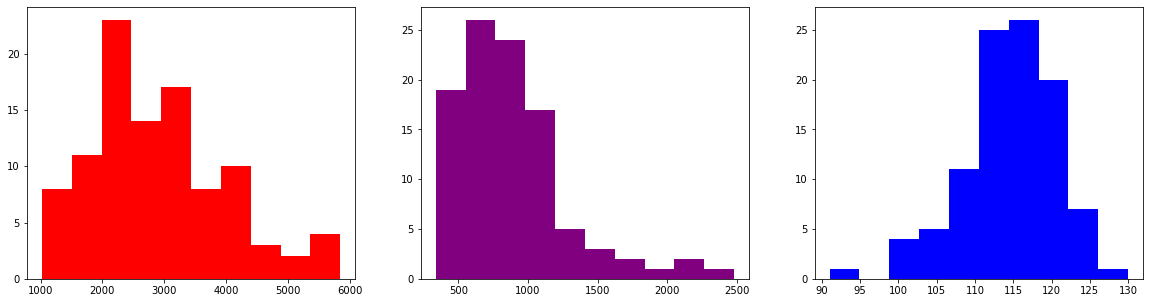

In [14]:
import matplotlib.pyplot as plt
n = 10
fig = plt.figure(figsize=(20,5))

simple_agentf = list()
plt.subplot(1,3,2)
for i in range(100):
    robot_position = np.random.choice([i for i in range(1,n-1)], size=(1, 2))[0]
    robot_position = find_station(n,robot_position,max_steps = 1000)
    stepsize = simple_environment(simple_agent, robot_position, 100000, n = n + 2, verbose = False)[0]
    simple_agentf.append(stepsize)
    simple_agentf = [i for i in simple_agentf if i < 100000]
plt.hist(simple_agentf, bins=10, color = 'purple') # simple reflex agent 

plt.subplot(1,3,3)
model_based_agentf = list()
for i in range(100):
    robot_position = np.random.choice([i for i in range(1,n-1)], size=(1, 2))[0]
    robot_position = find_station(n,robot_position,max_steps = 1000)
    stepsize = simple_environment(model_based_agent, robot_position, 100000, n = n + 2, verbose = False)[0]
    model_based_agentf.append(stepsize)
    model_based_agentf = [i for i in model_based_agentf if i < 100000]
plt.hist(model_based_agentf, bins=10, color = 'blue') # model-based reflex agent

plt.subplot(1,3,1)
random_agentf = list()
for i in range(100):
    robot_position = np.random.choice([i for i in range(1,n-1)], size=(1, 2))[0]
    robot_position = find_station(n,robot_position,max_steps = 1000)
    stepsize = simple_environment(random_agent, robot_position, 100000, n = n + 2, verbose = False)[0]
    random_agentf.append(stepsize)
    random_agentf = [i for i in random_agentf if i < 100000]
plt.hist(random_agentf, bins=10, color = 'red') # model-based reflex agent

plt.show()

## More advanced implementation tasks

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actualy depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currebntly clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [ ]:
# Your ideas/code